# ObsID : 0945040139, SRCNUM : 14, Instru : EPN
**Simbad :** SuperNova ([CBP2015] cdfs1 r 20120813 162A) https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%4012362450&Name=%5bCBP2015%5d%20cdfs1%20r%2020120813%20162A&submit=submit

## ESASky
There are two EPIC Stack pointers on two extremely close sources: one green and one blue. Additionally, GAIA's pointer is near the blue source. Changing the wavelength does not reveal any other sources. https://sky.esa.int/esasky/?target=53.854416666666665%20-27.61488888888889&hips=DSS2+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

**Green source**

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033524.9-273655
- IAU name : 4XMM J033524.9-273655
- RA : 03h 35m 24.952s
- DEC : -27° 36' 55.67"

**Blue source**

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033523.4-273644
- IAU name : 4XMM J033523.3-273644
- RA : 03h 35m 23.398s
- DEC : -27° 36' 44.79"

``GAIA``
- Designation : Gaia DR3 5081491054756743936
- RA : 03h 35m 22.569s
- DEC : -27° 36' 43.28"
- G : 21.303

or

- Designation : Gaia DR3 5081491089116647296
- RA : 03h 35m 26.006s
- DEC : -27° 36' 33.23"
- Parallax : 0.3275
- G : 20.012

In [2]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files
Spectrum, Background, Response, Auxiliary response.

In [3]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945040139_SRCNUM14_EPN_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.799e-02 +/- 2.597e-03 (82.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-5
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 5170 sec
 Using fit statistic: chi
 Using Background File                ObsID0945040139_SRCNUM14_EPN_background_spectrum.fits
  Background Exposure Time: 5170 sec
 Using Response (RMF) File            ObsID0945040139_SRCNUM14_EPN.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945040139_SRCNUM14_EPN.arf



In [4]:
n_cts = 2.799e-02*5170

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 144.7083


## Plot spectrum

In [5]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12-**")

     1 channels (1) ignored in spectrum #     1
      No channels ignored (no channels in specified range)



(-0.5, 852.5, 654.5, -0.5)

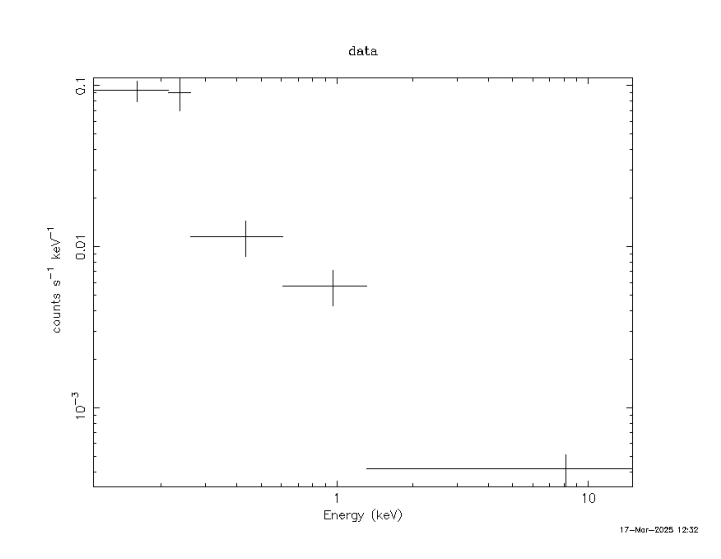

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [7]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody = mo.TBabs.nH.values[0]


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              8.788548e+10     using 4 bins.

Tes

(-0.5, 856.5, 659.5, -0.5)

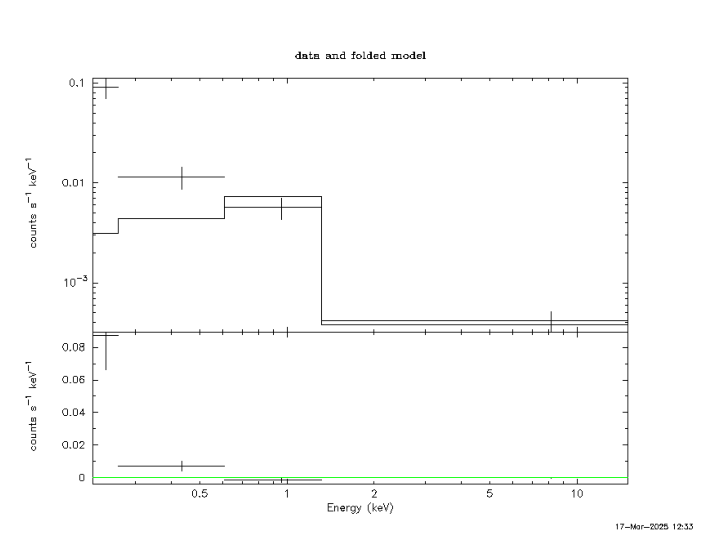

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [9]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.090146e+09     using 4 bins.

Test statistic : Chi-Squared              4.090146e+09     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
25.3786      1.53001      -2     0.0237493       2.37264   6.05702e-05
23.7545      127742       -2    0.00950527       6.52358   2.65739e-05
19.4749      157305        0    0.00332972       9.14308   3.13497e-05
17.

(-0.5, 856.5, 657.5, -0.5)

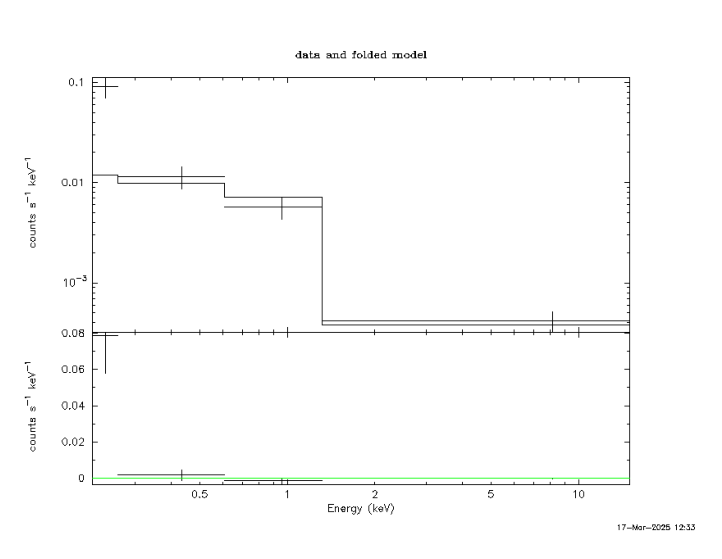

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [11]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              6.581311e+08     using 4 bins.

Test statistic : Chi-Squared              6.581311e+08     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
34.5262      2.28813      -2       1.08776       1.13890   0.0

(-0.5, 859.5, 655.5, -0.5)

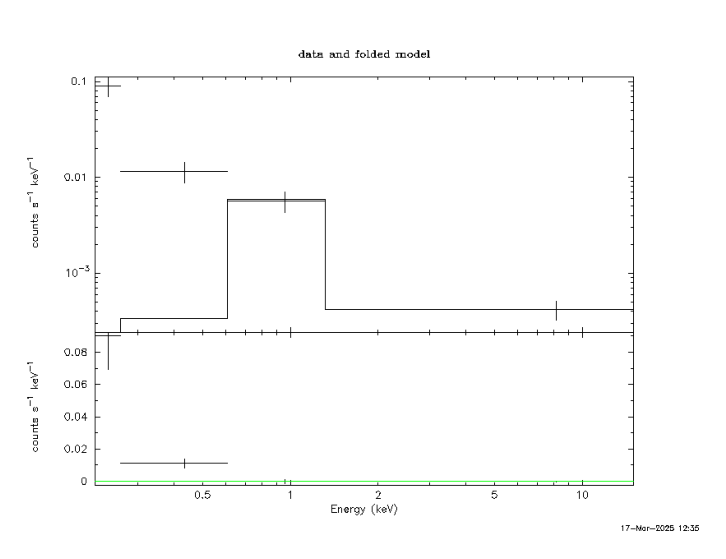

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [13]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.612887e+10     using 4 bins.

Test statistic : Chi-Squared              2.612887e+10     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
40.7348      1.1229       -1      0.235174       1.46117   2.07916e-05
29.3302      164738       -1     0.0774995       1.13460   2.05650e-05
24.3319      151337       -1    0.00702786       1.02552   1.80321e-05
2

(-0.5, 856.5, 662.5, -0.5)

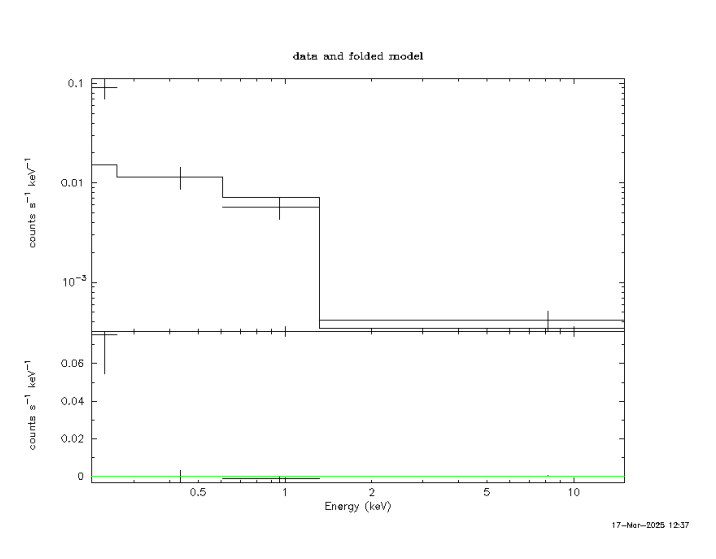

In [14]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung + Powerlaw model

In [15]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________

Ill-formed Fit problem - number of variable parameters exceeds number of bins


***Warning: Ill-formed Fit problem - number of variable parameters exceeds number of bins


Exception: Error executing command: fit

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :**

- RA = 53.8539672°
- Dec: -27.6154637°

53.85 -27.62

**Column density :** nH = 1*10^20 cm^-2

In [17]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")

The different models give a column density of :

bbody
(tbabs) : 18625.86965477254

bremss
(tbabs) : 237891.8207829017

apec
(tbabs) : 1.4281780221112524e+22

powerlaw
(tbabs) : 15004.493250512978


## Flux
### X-ray flux

In [16]:
AllModels.calcFlux(".2 12.0")

 Model Flux    2.4803 photons (1.9282e-08 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [3]:
Flux = 1.9282e-08 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END+f"F_X = {Flux} ergs/cm^2/s")

X-ray flux : F_X = 1.9282e-08 ergs/cm^2/s


### Optical flux
No GAIA information, so we use the lower limit of 20.7 mag.

In [23]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G1 =  21.303
G2 = 20.012

F1 = F_optical(G1)
F2 = F_optical(G2)

print(color.BOLD+"Optical  flux : "+color.END+f"F1_opt = {F1} ergs/cm^2/s")
print(color.BOLD+"Optical  flux : "+color.END+f"F2_opt = {F2} ergs/cm^2/s")

Optical  flux : F1_opt = 3.162199743232763e-14 ergs/cm^2/s
Optical  flux : F2_opt = 1.038458867272116e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [24]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F1_optical = {Flux/F1}")
print(f"F_x-ray = {Flux/F1}*F1_optical")
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F2_optical = {Flux/F2}")
print(f"F_x-ray = {Flux/F2}*F2_optical")

X-ray flux / Optical flux ratio : F_x-ray/F1_optical = 609765.402747384
F_x-ray = 609765.402747384*F1_optical
X-ray flux / Optical flux ratio : F_x-ray/F2_optical = 185678.99613251968
F_x-ray = 185678.99613251968*F2_optical


## Luminosity
The parallax is available for the blue source and for only one of the GAIA's designations.

In [6]:
"""GAIA"""
P_mas = 0.3275
d_kpc = 1/P_mas
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")

(GAIA)
Distance : 9.421984732824428e+21 cm
Luminosité : 2.1510313247082485e+37 erg/s
